## Model A


### Custome Traing Loop

Here, this involves incrementing the weights by 10% in the facial data to enable the generation of more precise facial features in the future.

    learning_rate = 0.01  # Adjust this value as needed

    for epoch in range(EPOCHS):
        total_loss = 0.0
        for batch in train_generator:
            batch_images, batch_labels = batch
            batch_labels = batch_labels.reshape(-1, 1)  # Ensure shape is (batch_size, 1)

            with tf.GradientTape() as tape:
                # Forward pass
                predictions = loaded_model(batch_images, training=True)
                # Compute the custom loss
                loss_value = custom_loss(batch_labels, predictions)

            # Calculate gradients
            gradients = tape.gradient(loss_value, loaded_model.trainable_variables)

            # Update model weights with a fraction of the gradients
            scaled_gradients = [0.1 * grad for grad in gradients]
            optimizer.apply_gradients(zip(scaled_gradients, loaded_model.trainable_variables))

            total_loss += loss_value

        average_loss = total_loss / len(train_generator)
        print(f'Epoch {epoch + 1}/{EPOCHS} - Loss: {average_loss:.4f}')

This take 20 Hours to Update the weights before this the Accuracy was 30-40%.

During this Training only one class is provided as Postive for faces.


### Training

In [ ]:
!unzip colab_data.zip -d .

Archive:  colab_data.zip
replace ./colab_data/count.bat? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./colab_data/count.bat  
replace ./colab_data/negative/Alvaro_Uribe_0_67.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace ./colab_data/negative/Alvaro_Uribe_0_67.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./colab_data/negative/Alvaro_Uribe_0_67.jpg  
  inflating: ./colab_data/negative/Amelie_Mauresmo_0_170.jpg  
  inflating: ./colab_data/negative/Atal_Bihari_Vajpayee_0_28.jpg  
  inflating: ./colab_data/negative/Donald_Rumsfeld_0_296.jpg  
  inflating: ./colab_data/negative/George_W_Bush_0_81.jpg  
  inflating: ./colab_data/negative/Gerhard_Schroeder_0_60.jpg  
  inflating: ./colab_data/negative/Gloria_Macapagal_Arroyo_0_396.jpg  
  inflating: ./colab_data/negative/Hugo_Chavez_0_250 - Copy.jpg  
  inflating: ./colab_data/negative/Jack_Straw_0_472.jpg  
  inflating: ./colab_data/negative/Jean_Chretien_0_541.jpg  
  inflating: ./col

In [ ]:
import os
import glob

def count_images_in_folders(folder_path):
    image_extensions = ["*.jpg", "*.jpeg", "*.png", "*.gif"]  # Add more extensions if needed

    for root, dirs, files in os.walk(folder_path):
        image_count = 0
        for extension in image_extensions:
            image_count += len(glob.glob(os.path.join(root, extension)))

        if image_count > 0:
            print(f"Folder: {root}")
            print(f"Image count: {image_count}\n")

# Specify the folder path you want to search
folder_path = "/content/colab_data"

if os.path.exists(folder_path) and os.path.isdir(folder_path):
    count_images_in_folders(folder_path)
else:
    print(f"The specified path '{folder_path}' does not exist or is not a directory.")


Folder: /content/colab_data
Image count: 5

Folder: /content/colab_data/positive
Image count: 220

Folder: /content/colab_data/negative
Image count: 24



In [ ]:
!mkdir split_data

mkdir: cannot create directory ‘split_data’: File exists


In [ ]:
import os

base_dir = '/content/split_data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Create the train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create the positive and negative subdirectories inside train and test
for directory in [train_dir, test_dir]:
    os.makedirs(os.path.join(directory, 'positive'), exist_ok=True)
    os.makedirs(os.path.join(directory, 'negative'), exist_ok=True)

In [ ]:
import shutil
import random
import os

source_positive_dir = '/content/colab_data/positive'
source_negative_dir = '/content/colab_data/negative'

train_positive_dir = os.path.join(train_dir, 'positive')
test_positive_dir = os.path.join(test_dir, 'positive')

train_negative_dir = os.path.join(train_dir, 'negative')
test_negative_dir = os.path.join(test_dir, 'negative')

# List all positive and negative image files
positive_images = os.listdir(source_positive_dir)
negative_images = os.listdir(source_negative_dir)

# Shuffle the lists of images randomly
random.shuffle(positive_images)
random.shuffle(negative_images)

# Calculate the split index for positive images
split_index_positive = int(0.8 * len(positive_images))

# Calculate the split index for negative images
split_index_negative = int(0.8 * len(negative_images))

# Copy 80% of the positive images to train/positive
for image in positive_images[:split_index_positive]:
    src_path = os.path.join(source_positive_dir, image)
    dest_path = os.path.join(train_positive_dir, image)
    shutil.copy(src_path, dest_path)

# Copy 20% of the positive images to test/positive
for image in positive_images[split_index_positive:]:
    src_path = os.path.join(source_positive_dir, image)
    dest_path = os.path.join(test_positive_dir, image)
    shutil.copy(src_path, dest_path)

# Copy 80% of the negative images to train/negative
for image in negative_images[:split_index_negative]:
    src_path = os.path.join(source_negative_dir, image)
    dest_path = os.path.join(train_negative_dir, image)
    shutil.copy(src_path, dest_path)

# Copy 20% of the negative images to test/negative
for image in negative_images[split_index_negative:]:
    src_path = os.path.join(source_negative_dir, image)
    dest_path = os.path.join(test_negative_dir, image)
    shutil.copy(src_path, dest_path)

In [ ]:
import os
import glob

def count_images_in_folders(folder_path):
    image_extensions = ["*.jpg", "*.jpeg", "*.png", "*.gif"]  # Add more extensions if needed

    for root, dirs, files in os.walk(folder_path):
        image_count = 0
        for extension in image_extensions:
            image_count += len(glob.glob(os.path.join(root, extension)))

        if image_count >= 0:
            print(f"Folder: {root}")
            print(f"Image count: {image_count}\n")

# Specify the folder path you want to search
folder_path = "/content/split_data"

if os.path.exists(folder_path) and os.path.isdir(folder_path):
    count_images_in_folders(folder_path)
else:
    print(f"The specified path '{folder_path}' does not exist or is not a directory.")


Folder: /content/split_data
Image count: 0

Folder: /content/split_data/train
Image count: 0

Folder: /content/split_data/train/positive
Image count: 209

Folder: /content/split_data/train/negative
Image count: 22

Folder: /content/split_data/test
Image count: 0

Folder: /content/split_data/test/positive
Image count: 77

Folder: /content/split_data/test/negative
Image count: 8



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the model structure from the JSON file
with open('xception_model_structure_face.json', 'r') as json_file:
    model_structure = json_file.read()

# Recreate the model from the saved structure
base_model = model_from_json(model_structure)

# Load the model weights from the H5 file
base_model.load_weights('xception_model_weights_face.h5')

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 99, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 99, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 99, 74, 32)           0         ['block1_conv1_bn[0][0]

In [ ]:
# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 99, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 99, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 99, 74, 32)           0         ['block1_conv1_bn[0][0]'

In [ ]:
from keras.callbacks import EarlyStopping

# Set batch size and number of epochs
batch_size = 16
epochs = 5  # You can set it to 3 if you prefer more speed

# Directory paths for your new dataset directories
train_data_dir = '/content/split_data/train'  # Adjust this to your training data directory
validation_data_dir = '/content/split_data/test'  # Adjust this to your validation data directory

# Define data generators without data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Prepare data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(200, 150),  # Updated target size without channels
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(200, 150),  # Updated target size without channels
    batch_size=batch_size,
    class_mode='binary')

# Define an early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='max', restore_best_weights=True)

# Train the model with early stopping
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping])

Found 231 images belonging to 2 classes.
Found 85 images belonging to 2 classes.
Epoch 1/5
14/14 [==============================] - 128s 9s/step - loss: 9.4674 - accuracy: 0.8000 - val_loss: 0.5602 - val_accuracy: 0.9125
Epoch 2/5
14/14 [==============================] - 114s 8s/step - loss: 0.2019 - accuracy: 0.9395 - val_loss: 0.1004 - val_accuracy: 0.9500
Epoch 3/5
14/14 [==============================] - 114s 8s/step - loss: 0.0876 - accuracy: 0.9721 - val_loss: 0.0810 - val_accuracy: 0.9750
Epoch 4/5
14/14 [==============================] - 111s 8s/step - loss: 0.1241 - accuracy: 0.9732 - val_loss: 0.1163 - val_accuracy: 0.9750
Epoch 5/5
14/14 [==============================] - 113s 8s/step - loss: 0.0520 - accuracy: 0.9860 - val_loss: 0.0368 - val_accuracy: 0.9875


In [ ]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("model_weights.h5")

print("Model architecture and weights have been saved.")

Model architecture and weights have been saved.


### Testing

In [ ]:
!pip install mtcnn
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json

# Load the model architecture from the JSON file
with open("model_architecture.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

# Load the model weights from the HDF5 file
loaded_model.load_weights("model_weights.h5")

In [ ]:
loaded_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 99, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 99, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 99, 74, 32)           0         ['block1_conv1_bn[0][0]'

In [ ]:
import cv2
from mtcnn import MTCNN

def image_preprocessing(image_path):

  try:
    image = cv2.imread(image_path)
  except:
    print("File Not Found")

  # Initialize MTCNN
  detector = MTCNN()
  faces = detector.detect_faces(image)

  # Check if any faces were detected
  if faces:
      # Get the coordinates of the first detected face
      x, y, w, h = faces[0]['box']

      # Ensure coordinates are within image bounds
      x = max(0, x)
      y = max(0, y)
      w = min(image.shape[1] - x, w)
      h = min(image.shape[0] - y, h)

      # Crop the image around the face
      cropped_face = image[y:y+h, x:x+w]

      # Resize the cropped face to 150x200 using bicubic interpolation
      resized_face = cv2.resize(cropped_face, (150, 200), interpolation=cv2.INTER_CUBIC)

      return resized_face


In [ ]:
import time

images = []

for i in range(1,6):
  images.append(image_preprocessing('/content/colab_data/test ({}).jpg'.format(i)))
  time.sleep(1)

1/1 [==============================] - 0s 144ms/step


In [ ]:
len(images),images[0].shape

(5, (200, 150, 3))

In [ ]:
import random
random.shuffle(images)

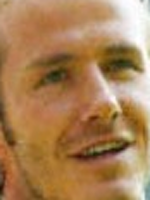

1/1 [==============================] - 2s 2s/step
Predicted Class: 1
Probability: 0.7895657420158386


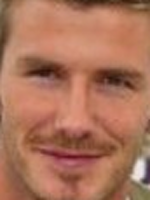

1/1 [==============================] - 0s 251ms/step
Predicted Class: 1
Probability: 0.9852958917617798


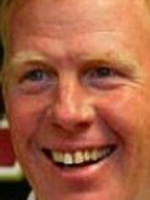

1/1 [==============================] - 0s 256ms/step
Predicted Class: 0
Probability: 0.22289693355560303


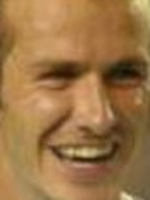

1/1 [==============================] - 0s 278ms/step
Predicted Class: 1
Probability: 0.7641075253486633


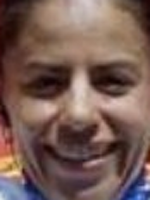

1/1 [==============================] - 0s 266ms/step
Predicted Class: 0
Probability: 0.002501585055142641


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow

# Define a function to load and preprocess an image for prediction
def load_and_preprocess_image(img):
    img = img.astype('float32')  # Convert to float32
    img_array = np.expand_dims(img, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values
    return img_array

for img in images:

  cv2_imshow(img)

  # Load and preprocess the image
  input_image = load_and_preprocess_image(img)

  # Make a prediction
  prediction = loaded_model.predict(input_image)

  # The 'prediction' variable now contains the model's output, which is a probability
  # For binary classification, you can convert it to a class label (0 or 1) based on a threshold
  threshold = 0.5  # Adjust this threshold as needed
  predicted_class = 1 if prediction > threshold else 0

  # Print the predicted class and probability
  print(f"Predicted Class: {predicted_class}")
  print(f"Probability: {prediction[0][0]}")
